In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report ,confusion_matrix

In [ ]:
# Load data
(xtr, ytr), (xte, yte) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Training Set: X=%s, y=%s' % (xtr.shape, ytr.shape))
print('Test: X=%s, y=%s' % (xte.shape, yte.shape))

Training Set: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


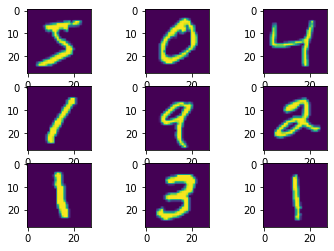

In [ ]:
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(xtr[i])

In [ ]:
# reshape
xtr = xtr / 255.0
xte = xte / 255.0

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(xtr, ytr, validation_data=(xte,yte), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9267 - val_loss: 0.1405 - val_accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9669 - val_loss: 0.0962 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0859 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0686 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0773 - val_accuracy: 0.9758


In [ ]:
loss, accuracy = model.evaluate(xte, yte)
print("Validation Loss: ", loss)
print("Validation Accuracy: ", accuracy*100)

313/313 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9758
Validation Loss:  0.0773172676563263
Validation Accuracy:  97.57999777793884


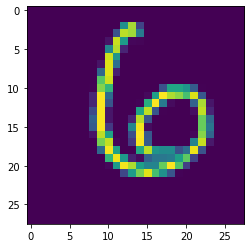

In [ ]:
plt.imshow(xte[100])
prediction=model.predict(xte)

In [ ]:
print(np.argmax(prediction[100]))

6


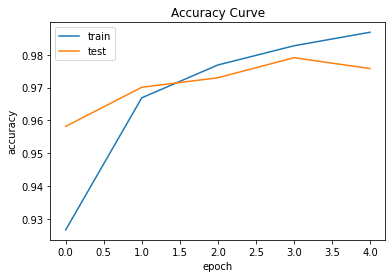

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

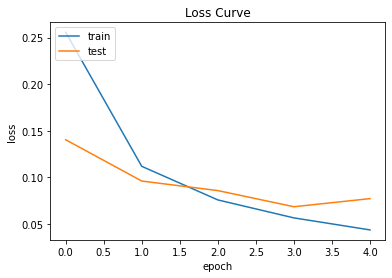

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the model to disk.
model.save('mnist.h5')

In [ ]:
# Load the model from disk later using:
model.load_weights('mnist.h5')

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(xte[:5])

In [ ]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

[7 2 1 0 4]


In [ ]:
# Check our predictions against the ground truths.
print(yte[:5]) 

[7 2 1 0 4]


In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=8f69543b384d232c809805dca7de0de6558d90d6dbe28a8eb5682694a04ef5e1
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 2.8MB/s 
     |████████████████████████████████| 112kB 55.5MB/s 
     |████████████████████████████████| 4.4MB 35.2MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 122kB 56.3MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=7bcb363b01f1370f3d63c9107da3b8c857220469d9b51f495448d7d88cda7235
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=77560315dedfae5e977cd4c858cd62fd87fafa539fa069a4f2cfac6139b9b807
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=c1ac477e0a188fca39ee50a06e4a0dbd60f43942c6b8cbd213f13fd53ee24562
  Stored in directory: /root/.cache/pip/whee

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow.compat.v2 as tf
from PIL import Image , ImageOps
import cv2
import numpy as np
#labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():

 model = tf.keras.models.load_model('/content/mnist.h5')
 return model

model = lm()

st.write("""
# MNIST Model
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def predict(img):
 #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res)

if file is None:
 st.text("Pls upload image")
else:
 image = Image.open(file)
 st.image(image,use_column_width=True)
 p = predict(image)
 st.success(str(p))

Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 15:05:37--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.44.17.83, 54.164.48.176, 54.85.41.146, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.44.17.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  51.0MB/s    in 0.3s    

2020-09-01 15:05:38 (51.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 1gucT1g3sK4pHqCpLdQbwzJErD6_51BwECtLjhE9GabADrfXW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://a0b1c6a52f61.ngrok.io'